PCA

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
if __name__ == "__main__":
    
    dt_Ecommerce = pd.read_csv('./Data/ECommerce_consumer_behaviour.csv')

    columns_to_drop = ['reordered', 'department', 'product_name']
    dt_features = dt_Ecommerce.drop(columns=columns_to_drop, axis=1)
    dt_target = dt_Ecommerce['reordered']

    dt_features = StandardScaler().fit_transform(dt_features)
    X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

    # Manejar los valores faltantes (NaN) en X_train
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)

    # Aplicar PCA al conjunto de datos sin valores faltantes
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train_imputed)

    # Manejar los valores faltantes (NaN) en X_test
    X_test_imputed = imputer.transform(X_test)

    # Aplicar PCA al conjunto de datos sin valores faltantes
    X_test_pca = pca.transform(X_test_imputed)

    # Crear y entrenar el modelo de regresión logística
    logistic = LogisticRegression(solver='lbfgs')
    logistic.fit(X_train_pca, y_train)

    # Evaluar el modelo en el conjunto de prueba
    accuracy = logistic.score(X_test_pca, y_test)
    print(f"Exactitud del modelo: {accuracy}")

Exactitud del modelo: 0.625


/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

IPCA

In [3]:
if __name__ == "__main__":
    
    dt_Ecommerce = pd.read_csv('./Data/ECommerce_consumer_behaviour.csv')

    columns_to_drop = ['reordered', 'department', 'product_name']
    dt_features = dt_Ecommerce.drop(columns=columns_to_drop, axis=1)
    dt_target = dt_Ecommerce['reordered']

    dt_features = StandardScaler().fit_transform(dt_features)
    X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

    # Manejar los valores faltantes (NaN) en X_train
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)

    # Aplicar IPCA al conjunto de datos sin valores faltantes
    ipca = IncrementalPCA(n_components=3, batch_size=10)
    X_train_ipca = ipca.fit_transform(X_train_imputed)

    # Manejar los valores faltantes (NaN) en X_test
    X_test_imputed = imputer.transform(X_test)

    # Aplicar IPCA al conjunto de datos sin valores faltantes
    X_test_ipca = ipca.transform(X_test_imputed)

    # Crear y entrenar el modelo de regresión logística con IPCA
    logistic_ipca = LogisticRegression(solver='lbfgs')
    logistic_ipca.fit(X_train_ipca, y_train)

    # Evaluar el modelo en el conjunto de prueba con IPCA
    accuracy_ipca = logistic_ipca.score(X_test_ipca, y_test)
    print(f"Exactitud del modelo con IPCA: {accuracy_ipca}")

Exactitud del modelo con IPCA: 0.6216666666666667


/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

Validar que los conjuntos de datos sean iguales

In [4]:
X_train.shape

(1399, 9)

In [5]:
y_train.shape

(1399,)

Validar cuales componenetes aportan mayor información

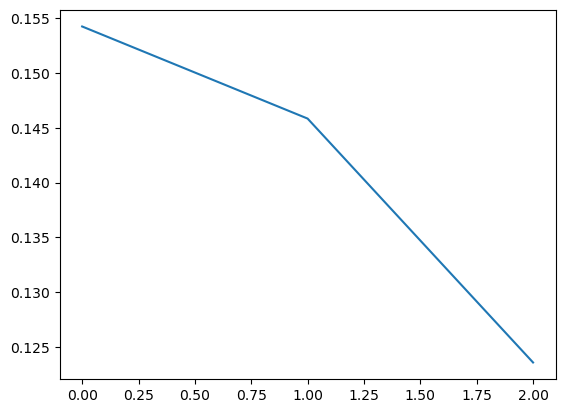

Exactitud del modelo con PCA: 0.625
Exactitud del modelo con IPCA: 0.6216666666666667


In [6]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

print(f"Exactitud del modelo con PCA: {accuracy}")
print(f"Exactitud del modelo con IPCA: {accuracy_ipca}")

Graficos PCA

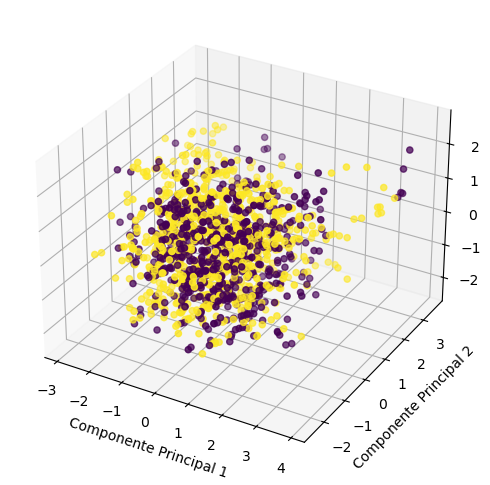

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Suponiendo que ya tienes X_train_pca
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()

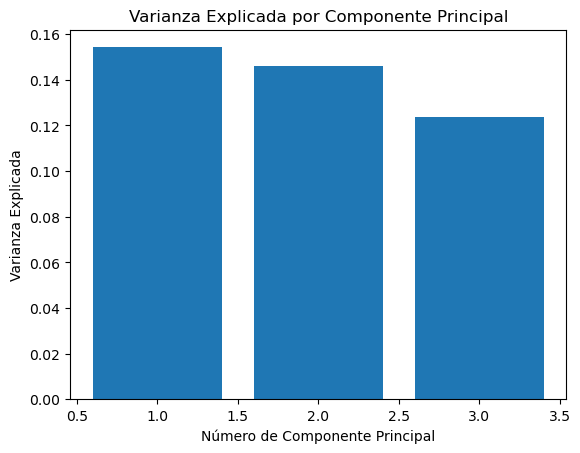

In [8]:
#Este gráfico te mostrará cómo se distribuyen los datos en las tres primeras componentes principales.

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

#Esto te dará una idea de cuánta varianza explica cada componente principal.

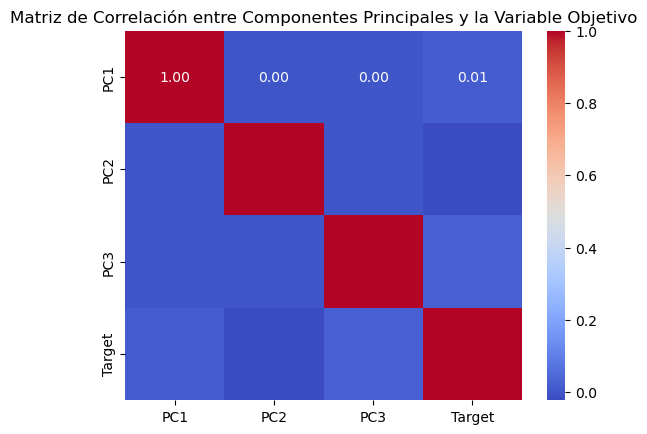

In [9]:
import seaborn as sns

# Suponiendo que ya tienes X_train_pca y y_train
components_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3'])
components_df['Target'] = y_train

corr_matrix = components_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Componentes Principales y la Variable Objetivo')
plt.show()

#Puedes usar un gráfico de calor para visualizar la relación entre las primeras componentes principales y la variable objetivo.

Graficos IPCA

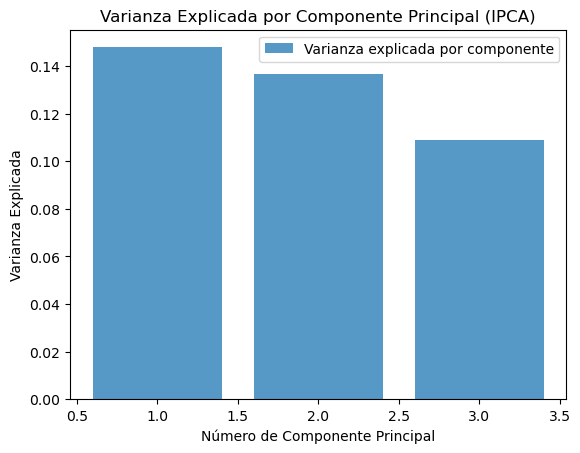

In [10]:
# Graficar la varianza explicada por cada componente principal
explained_variance_ratio = ipca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Gráfico de barras para la varianza explicada
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.75, align='center', label='Varianza explicada por componente')
plt.title('Varianza Explicada por Componente Principal (IPCA)')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada')
plt.legend()
plt.show()

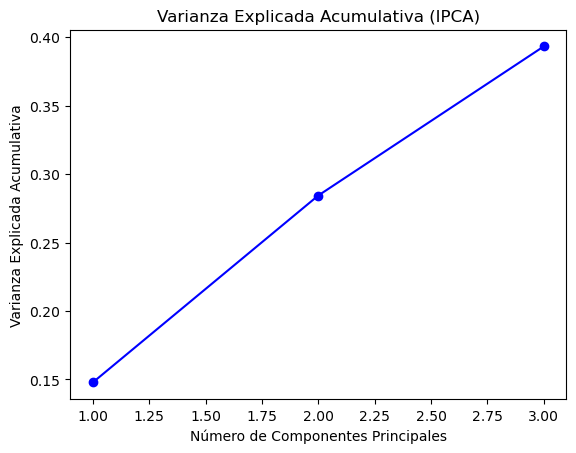

In [11]:
# Gráfico de línea para la varianza explicada acumulativa
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Varianza Explicada Acumulativa (IPCA)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()